In [1]:
%pylab inline
from wallet.util.analysis import Analysis
categories = ['Industries']
previous = ['XLF','FBT','GDX','IBB','IYW','XLP','VDC','IXN','XBI']
ana = Analysis.from_funds(50, categories=categories, additions=previous)
print(ana)
ana.screen().head(20)

Populating the interactive namespace from numpy and matplotlib
from 2019-10-10 to 2019-12-27 - 62 symbols


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
FBT,50.0,0.401113,0.284372,-0.135273,0.221701,0.327251,0.566922,1.257717,1.382614,22.518391,2.707615,0.739305
IXJ,50.0,0.257683,0.181738,-0.110500,0.118541,0.273211,0.385971,0.612131,1.374211,15.315380,0.981852,-0.117180
FHLC,50.0,0.281596,0.206277,-0.099586,0.096506,0.306719,0.452527,0.662250,1.326660,16.629186,1.158972,-0.180075
VHT,50.0,0.281738,0.206882,-0.105778,0.106644,0.302261,0.430976,0.682103,1.323468,16.734045,1.092992,-0.151825
IBB,50.0,0.389774,0.289504,-0.153640,0.159385,0.348992,0.573322,1.233373,1.318935,22.846942,1.570852,0.682231
XLV,50.0,0.268392,0.203803,-0.133201,0.103501,0.289561,0.442173,0.641594,1.277977,15.881149,1.011617,-0.174809
IYH,50.0,0.273574,0.208675,-0.123206,0.102722,0.306808,0.450444,0.645925,1.272976,16.085601,1.155894,-0.193127
XT,50.0,0.212456,0.169383,-0.220548,0.137520,0.202803,0.336525,0.574955,1.207435,13.055481,1.739751,-0.171135
FXH,50.0,0.280019,0.232945,-0.185761,0.127204,0.288762,0.460790,0.703116,1.168013,16.192043,1.330457,-0.317229


In [2]:
print(ana)
ana.optimize_iteration([40, 30, 30], additions=previous)

from 2019-10-10 to 2019-12-27 - 58 symbols


([(0.1745, {'GDX': 1}),
  (0.8304, {'IXN': 1}),
  (1.3235, {'VHT': 1}),
  (1.3637, {'XLV': 0.7519, 'IXN': 0.2481}),
  (1.3742, {'IXJ': 1}),
  (1.3998, {'FXH': 0.687, 'KBE': 0.313}),
  (1.4563, {'KRE': 0.3056, 'FXH': 0.6944}),
  (1.5166, {'KRE': 0.2569, 'XLV': 0.7431}),
  (1.5239, {'KBE': 0.2771, 'XLV': 0.7229}),
  (1.5332, {'KBE': 0.286, 'IYH': 0.714}),
  (1.5367, {'KRE': 0.2679, 'IYH': 0.7321}),
  (1.5436, {'IXJ': 0.792, 'KRE': 0.208}),
  (1.5589, {'IYG': 0.4535, 'XLV': 0.5465}),
  (1.5702, {'KBE': 0.2762, 'VHT': 0.7238}),
  (1.5714, {'IYH': 0.538, 'IYG': 0.462}),
  (1.5822, {'FNCL': 0.3288, 'IXJ': 0.6712}),
  (1.5913, {'FHLC': 0.5608, 'IYG': 0.4392}),
  (1.5915, {'IYG': 0.4411, 'VHT': 0.5589}),
  (1.5973, {'VDC': 0.5394, 'FHLC': 0.4606}),
  (1.5973, {'XLF': 0.4019, 'IYH': 0.5981}),
  (1.6024, {'VFH': 0.3657, 'FXH': 0.3149, 'IBB': 0.3194}),
  (1.6031, {'VDC': 0.5435, 'VHT': 0.4565}),
  (1.6221, {'FHLC': 0.6145, 'XLF': 0.3855}),
  (1.6319, {'XBI': 0.4816, 'IYW': 0.5184}),
  (1.6414, {'

,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Portfolio,50.0,0.276873,0.137048,-0.084459,0.192034,0.264683,0.358995,0.582917,1.962344,16.020389,0.959482,0.037349
FBT,50.0,0.401113,0.284372,-0.135273,0.221701,0.327251,0.566922,1.257717,1.382614,22.518391,2.707615,0.739305
FHLC,50.0,0.281596,0.206277,-0.099586,0.096506,0.306719,0.452527,0.662250,1.326660,16.629186,1.158972,-0.180075
IBB,50.0,0.389774,0.289504,-0.153640,0.159385,0.348992,0.573322,1.233373,1.318935,22.846942,1.570852,0.682231
XBI,50.0,0.456604,0.366529,-0.120607,0.200567,0.375824,0.606168,1.575201,1.224099,26.548316,2.254724,1.098193
XLF,50.0,0.213718,0.227492,-0.378737,0.055494,0.217966,0.363390,0.786056,0.904565,13.242930,2.185428,-0.056387
IYW,50.0,0.235435,0.264367,-0.429919,0.084970,0.297184,0.423602,0.593101,0.860539,14.632420,2.549500,-0.973575
IXN,50.0,0.233385,0.271497,-0.392002,0.089608,0.304203,0.365300,0.762788,0.830392,14.771916,2.556903,-0.579918
XLP,50.0,0.095154,0.121521,-0.134206,0.012273,0.107243,0.187022,0.320777,0.717720,4.709527,1.448328,-0.210113


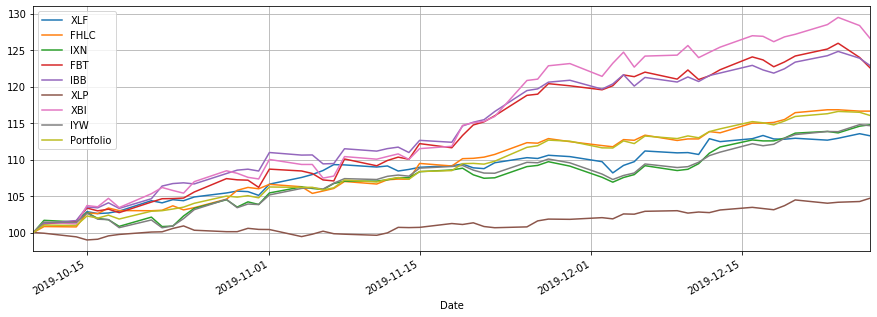

In [3]:
ana.graph({'XLF': 12,
      'FBT': 8,
      'XLP': 20,
      'FHLC': 8,
      'IBB': 13,
      'IXN': 9,
      'XBI': 14,
      'IYW': 16}) #7,9

,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Portfolio,50.0,0.258957,0.115442,0.001950,0.177524,0.254212,0.340614,0.534516,2.174426,14.607681,0.640477,0.188148
FBT,50.0,0.401113,0.284372,-0.135273,0.221701,0.327251,0.566922,1.257717,1.382614,22.518391,2.707615,0.739305
IBB,50.0,0.389774,0.289504,-0.153640,0.159385,0.348992,0.573322,1.233373,1.318935,22.846942,1.570852,0.682231
XBI,50.0,0.456604,0.366529,-0.120607,0.200567,0.375824,0.606168,1.575201,1.224099,26.548316,2.254724,1.098193
XLF,50.0,0.213718,0.227492,-0.378737,0.055494,0.217966,0.363390,0.786056,0.904565,13.242930,2.185428,-0.056387
IYW,50.0,0.235435,0.264367,-0.429919,0.084970,0.297184,0.423602,0.593101,0.860539,14.632420,2.549500,-0.973575
VDC,50.0,0.104532,0.114693,-0.104311,0.027574,0.101741,0.205788,0.313936,0.842211,5.339224,1.037192,-0.021242
IXN,50.0,0.233385,0.271497,-0.392002,0.089608,0.304203,0.365300,0.762788,0.830392,14.771916,2.556903,-0.579918
XLP,50.0,0.095154,0.121521,-0.134206,0.012273,0.107243,0.187022,0.320777,0.717720,4.709527,1.448328,-0.210113
GDX,50.0,0.107416,0.570017,-1.306038,-0.187291,0.182067,0.454265,1.322039,0.174520,3.653094,6.927176,-0.226190


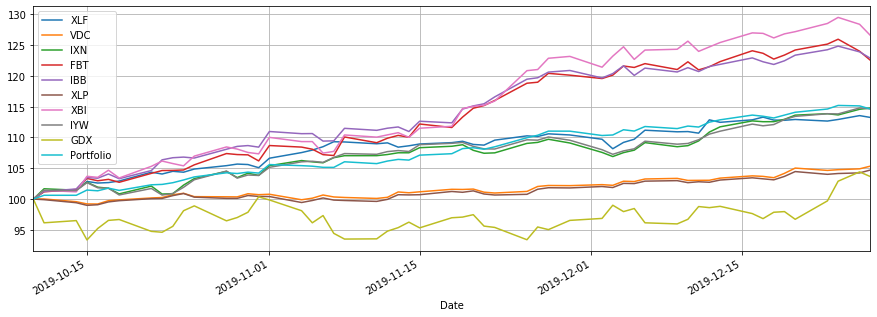

In [4]:
ana.graph({'XLF': 17, 'FBT': 15, 'GDX': 8, 'IBB': 10, 'IYW': 8, 'XLP': 12, 'VDC': 10, 'IXN': 10, 'XBI': 10})